<a href="https://colab.research.google.com/github/oohlizha/Tugas-Kelompok/blob/main/Cosmetics(tugas_akhir).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpy pandas seaborn matplotlib scipy scikit-learn


In [3]:
# Aljabar linear
import numpy as np

# Pemrosesan data
import pandas as pd

# Visualisasi data
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Statistik
from scipy.stats import skew, norm, probplot
from scipy.stats import kurtosis
from scipy import stats

# Algoritma machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [4]:
#Melakukan import data "Bank Churn Modelling".
# Baca dataset
df = pd.read_csv("cosmetics.csv")

In [5]:
# Pemahaman Struktur Data
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


Deskripsi :
* Label: Menyimpan label atau kategori produk kosmetik. Misalnya, produk perawatan kulit, produk make-up, dsb.
* Brand: Nama merek dari produk kosmetik. Misalnya, L'Oréal, Maybelline, dsb.
* Name: Nama atau deskripsi spesifik dari produk kosmetik. Misalnya, "L'Oréal Paris Revitalift", dsb.
* Price: Harga produk kosmetik dalam satuan tertentu (misalnya dolar atau rupiah).
* Rank: Peringkat produk berdasarkan penilaian atau ulasan, biasanya dalam rentang tertentu (misalnya 1-5 atau 1-10).
* Ingredients: Daftar bahan-bahan yang terkandung dalam produk kosmetik.
* Combination: Jumlah review atau skor terkait seberapa cocok produk ini untuk kulit kombinasi.
* Dry: Jumlah review atau skor terkait seberapa cocok produk ini untuk kulit kering.
* Normal: Jumlah review atau skor terkait seberapa cocok produk ini untuk kulit normal.
* Oily: Jumlah review atau skor terkait seberapa cocok produk ini untuk kulit berminyak.
* Sensitive: Jumlah review atau skor terkait seberapa cocok produk ini untuk kulit sensitif.

In [6]:
# Statistik deskriptif
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,1472.0,55.584239,45.014429,3.0,30.0,42.5,68.0,370.0
Rank,1472.0,4.153261,0.633918,0.0,4.0,4.3,4.5,5.0
Combination,1472.0,0.656250,0.475120,0.0,0.0,1.0,1.0,1.0
Dry,1472.0,0.614130,0.486965,0.0,0.0,1.0,1.0,1.0
Normal,1472.0,0.652174,0.476442,0.0,0.0,1.0,1.0,1.0
Oily,1472.0,0.607337,0.488509,0.0,0.0,1.0,1.0,1.0
Sensitive,1472.0,0.513587,0.499985,0.0,0.0,1.0,1.0,1.0


In [7]:
# Evaluasi Integritas Data
# Memeriksa nilai data yang hilang
missing_values = df.isna().sum().sort_values(ascending = False)
# Tampilkan nilai data yang hilang
print("Nilai-nilai yang Hilang:\n", missing_values)

Nilai-nilai yang Hilang:
 Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64


In [8]:
# Memeriksa Dulikasi
df.duplicated().sum()

0

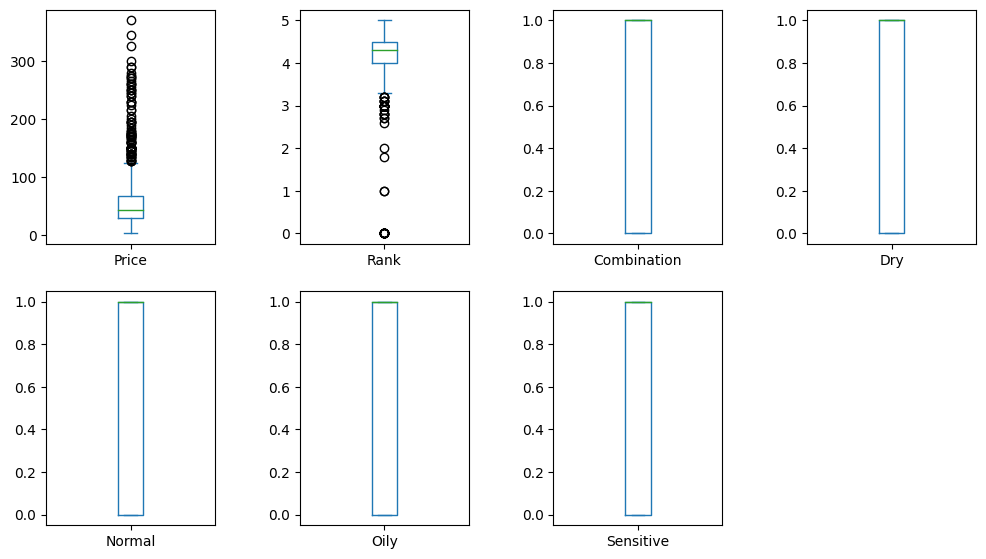

In [20]:
# Memeriksa Outlier
# Daftar nama kolom yang ingin dihapus
columns_to_drop = ['Ingredients']
# Pilih hanya kolom-kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
# cek outlier
numerical_columns.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

In [11]:
# 2.3.5. Memeriksa Outlier
# Memilih hanya atribut numerik
numeric_cols = df.select_dtypes(include='number')
# Menghitung IQR untuk setiap kolom
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
# Mengidentifikasi outlier
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))
# Menampilkan atribut numerik yang memiliki outlier
print("Atribut numerik dengan outlier:")
print(outliers[outliers].index)
outliers.sum()

Atribut numerik dengan outlier:
RangeIndex(start=0, stop=1472, step=1)


Price          91
Rank           50
Combination     0
Dry             0
Normal          0
Oily            0
Sensitive       0
dtype: int64

Pada dataset in terdapat 91 outlier pada atribut price, dan 50 outlier pada atribut rank.

In [12]:
#Memeriksa Data Tidak Konsisten
# Cek unik nilai pada kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
  unique_values = df[col].unique()
print(f'Unique values in {col}: {unique_values}')

Unique values in Ingredients: ['Algae (Seaweed) Extract, Mineral Oil, Petrolatum, Glycerin, Isohexadecane, Microcrystalline Wax, Lanolin Alcohol, Citrus Aurantifolia (Lime) Extract, Sesamum Indicum (Sesame) Seed Oil, Eucalyptus Globulus (Eucalyptus) Leaf Oil, Sesamum Indicum (Sesame) Seed Powder, Medicago Sativa (Alfalfa) Seed Powder, Helianthus Annuus (Sunflower) Seedcake, Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal, Sodium Gluconate, Copper Gluconate, Calcium Gluconate, Magnesium Gluconate, Zinc Gluconate, Magnesium Sulfate, Paraffin, Tocopheryl Succinate, Niacin, Water, Beta-Carotene, Decyl Oleate, Aluminum Distearate, Octyldodecanol, Citric Acid, Cyanocobalamin, Magnesium Stearate, Panthenol, Limonene, Geraniol, Linalool, Hydroxycitronellal, Citronellol, Benzyl Salicylate, Citral, Sodium Benzoate, Alcohol Denat., Fragrance.'
 'Galactomyces Ferment Filtrate (Pitera), Butylene Glycol, Pentylene Glycol, Water, Sodium Benzoate, Methylparaben, Sorbic Acid.'
 'Water, Dicaprylyl Carb

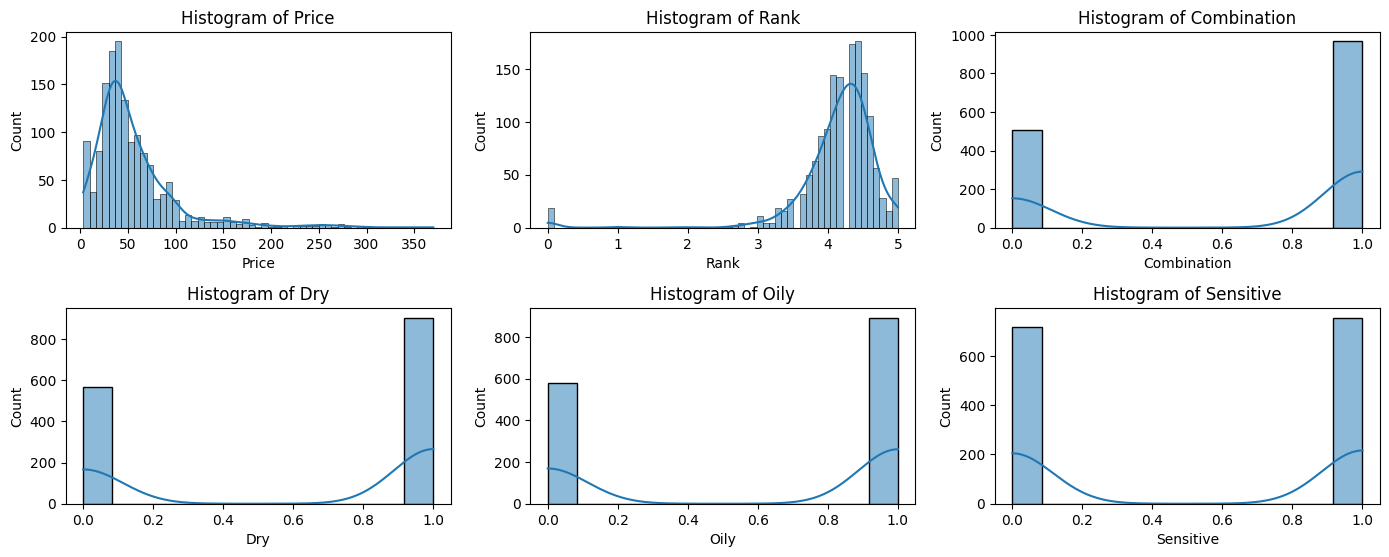

In [ ]:
# Daftar kolom yang akan dibuatkan histogram
columns_to_plot = ['Price', 'Rank', 'Combination', 'Dry', 'Oily', 'Sensitive']

# Membuat subplot untuk histogram
plt.figure(figsize=(14, 8))
for i, column in enumerate(columns_to_plot, 1):
  plt.subplot(3, 3, i)
  sns.histplot(data=df, x=column, kde=True)
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
plt.tight_layout()
plt.show()

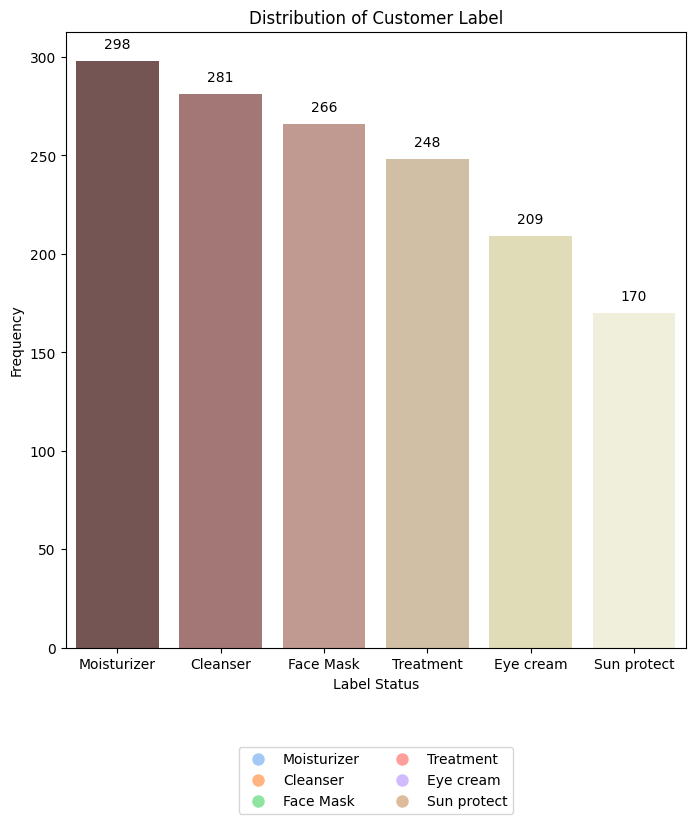

In [22]:
# Membuat duplikat sementara DataFrame
df_temp = df.copy()

# Mengganti nilai dalam DataFrame duplikat dengan label yang sesuai
df_temp['Label'] = df_temp['Label'].replace({1: 'Label', 0: 'Not Label'})

# Hitung jumlah observasi distribusi data Label
Label_counts = df_temp['Label'].value_counts()

# Persiapan data untuk bar chart
labels = Label_counts.index
values = Label_counts.values

# Plot bar chart
plt.figure(figsize=(8, 8))
bars = sns.barplot(x=labels, y=values, hue=labels, palette="pink", dodge=False)

# Tambahkan nilai data pada grafik
for i, value in enumerate(values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

# Tambahkan legend berdasarkan warna pada sumbu x
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                            markerfacecolor=sns.color_palette("pastel")[i], markersize=10)
                 for i, label in enumerate(labels)]

plt.title('Distribution of Customer Label')
plt.xlabel('Label Status')
plt.ylabel('Frequency')

# Letakkan legend pada posisi bawah
plt.legend(handles=legend_labels, bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)

plt.show()


Dari hasil data diatas dapat dilihat bahwa jenis skincare yang paling banyak jenisnya adalah Moisturizer dengan jumlah 298 Brand.

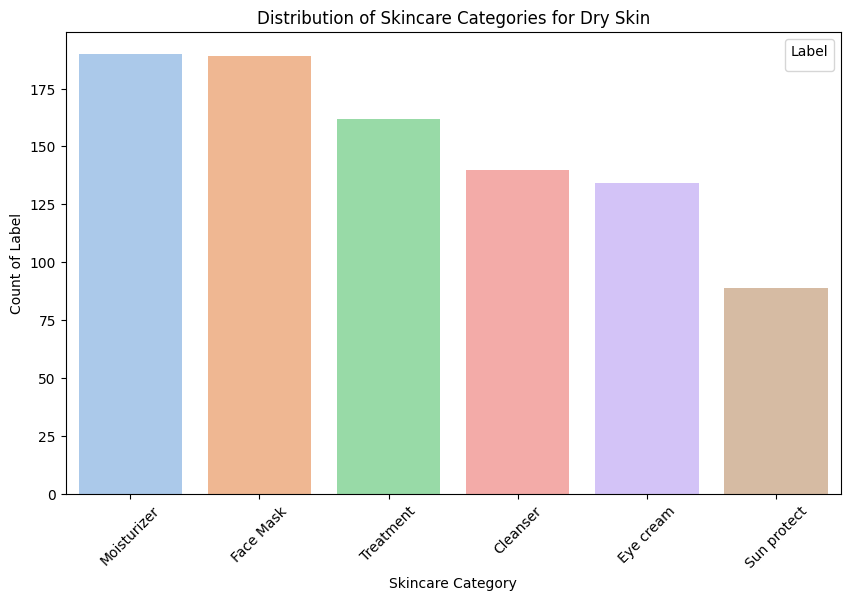

In [79]:
# Filter data untuk hanya mencakup produk dengan nilai "1" di kolom "Dry"
dry_skin_data = df[df['Dry'] == 1]

# Kelompokkan produk berdasarkan kategori moisturizer dan hitung jumlah produk dalam setiap kelompok
dry_skin_counts = dry_skin_data['Label'].value_counts().reset_index(name='Count')

# Buat bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=dry_skin_counts, x='Label', y='Count', hue='Label', palette='pastel', dodge=False)
plt.title('Distribution of Skincare Categories for Dry Skin')
plt.xlabel('Skincare Category')
plt.ylabel('Count of Label')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar mudah dibaca
plt.legend(title='Label', loc='upper right')
plt.show()


Data diatas menunjukkan bahwa produk Moisturizer adalah produk yang paling cocok untuk kulit kering dibandingkan dengan face mask, treatment, cleanser, eye cream, dan sun protect.

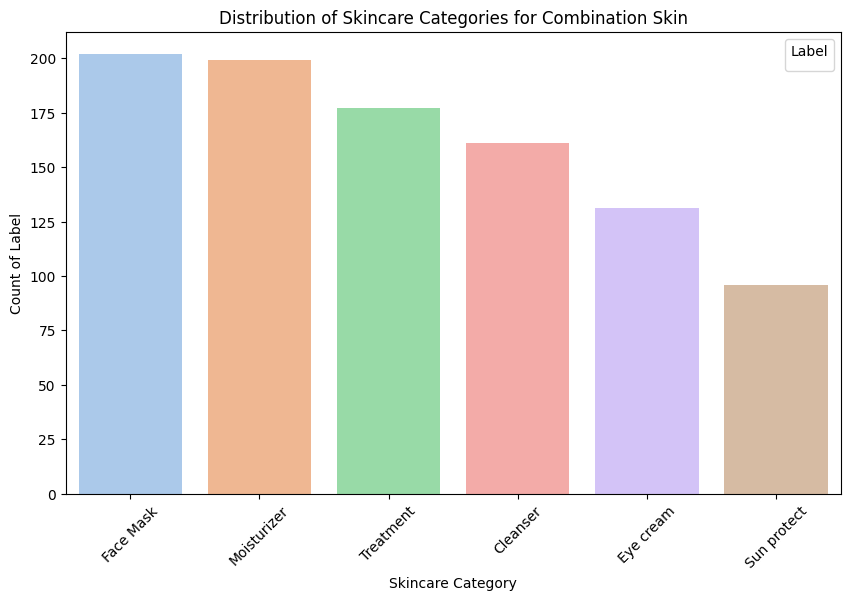

In [80]:
# Filter data untuk hanya mencakup produk dengan nilai "1" di kolom "Combination"
Combination_skin_data = df[df['Combination'] == 1]

# Kelompokkan produk berdasarkan kategori moisturizer dan hitung jumlah produk dalam setiap kelompok
Combination_skin_counts = Combination_skin_data['Label'].value_counts().reset_index(name='Count')

# Buat bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=Combination_skin_counts, x='Label', y='Count', hue='Label', palette='pastel', dodge=False)
plt.title('Distribution of Skincare Categories for Combination Skin')
plt.xlabel('Skincare Category')
plt.ylabel('Count of Label')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar mudah dibaca
plt.legend(title='Label', loc='upper right')
plt.show()

Data diatas menunjukkan bahwa produk Face Mask adalah produk yang paling cocok untuk kulit kombinasi dibandingkan dengan moisturizer, treatment, cleanser, eye cream, dan sun protect.

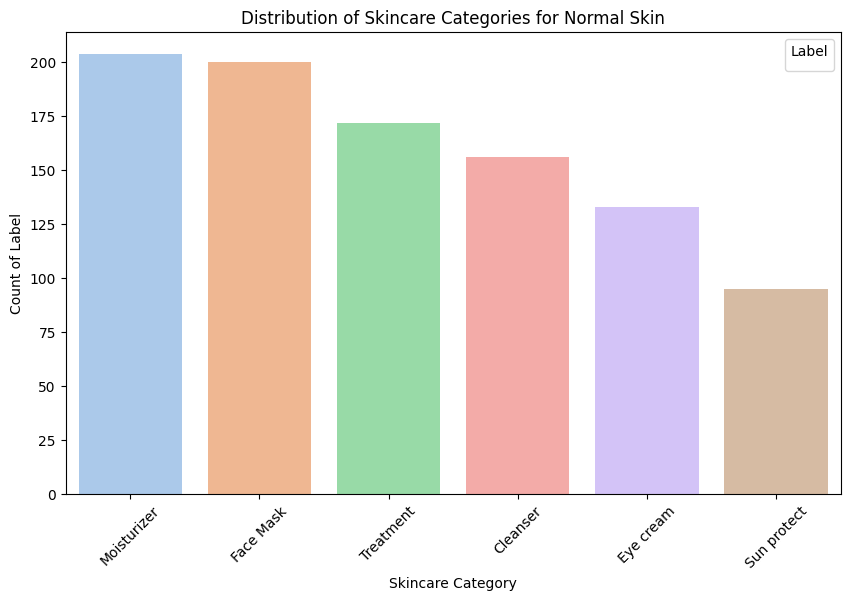

In [51]:
# Filter data untuk hanya mencakup produk dengan nilai "1" di kolom "Normal"
Normal_skin_data = df[df['Normal'] == 1]

# Kelompokkan produk berdasarkan kategori moisturizer dan hitung jumlah produk dalam setiap kelompok
Normal_skin_counts = Normal_skin_data['Label'].value_counts().reset_index(name='Count')

# Buat bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=Normal_skin_counts, x='Label', y='Count', hue='Label', palette='pastel', dodge=False)
plt.title('Distribution of Skincare Categories for Normal Skin')
plt.xlabel('Skincare Category')
plt.ylabel('Count of Label')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar mudah dibaca
plt.legend(title='Label', loc='upper right')
plt.show()

Data diatas menunjukkan bahwa produk Moisturizer adalah produk yang paling cocok untuk kulit normal dibandingkan dengan face mask, treatment, cleanser, eye cream, dan sun protect.

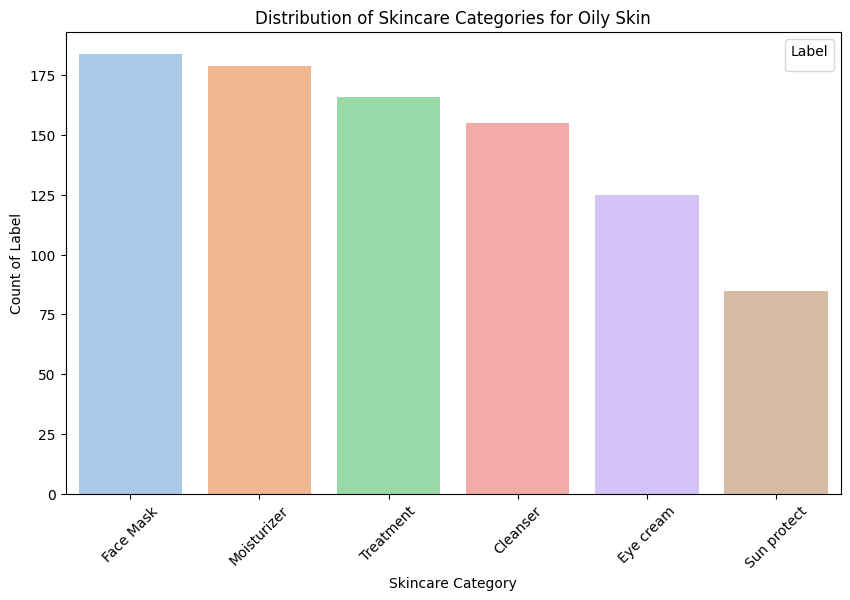

In [52]:
# Filter data untuk hanya mencakup produk dengan nilai "1" di kolom "Oily"
Oily_skin_data = df[df['Oily'] == 1]

# Kelompokkan produk berdasarkan kategori moisturizer dan hitung jumlah produk dalam setiap kelompok
Oily_skin_counts = Oily_skin_data['Label'].value_counts().reset_index(name='Count')

# Buat bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=Oily_skin_counts, x='Label', y='Count', hue='Label', palette='pastel', dodge=False)
plt.title('Distribution of Skincare Categories for Oily Skin')
plt.xlabel('Skincare Category')
plt.ylabel('Count of Label')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar mudah dibaca
plt.legend(title='Label', loc='upper right')
plt.show()

Data diatas menunjukkan bahwa produk Face Mask adalah produk yang paling cocok untuk kulit berminyak dibandingkan dengan moisturizer, treatment, cleanser, eye cream, dan sun protect.

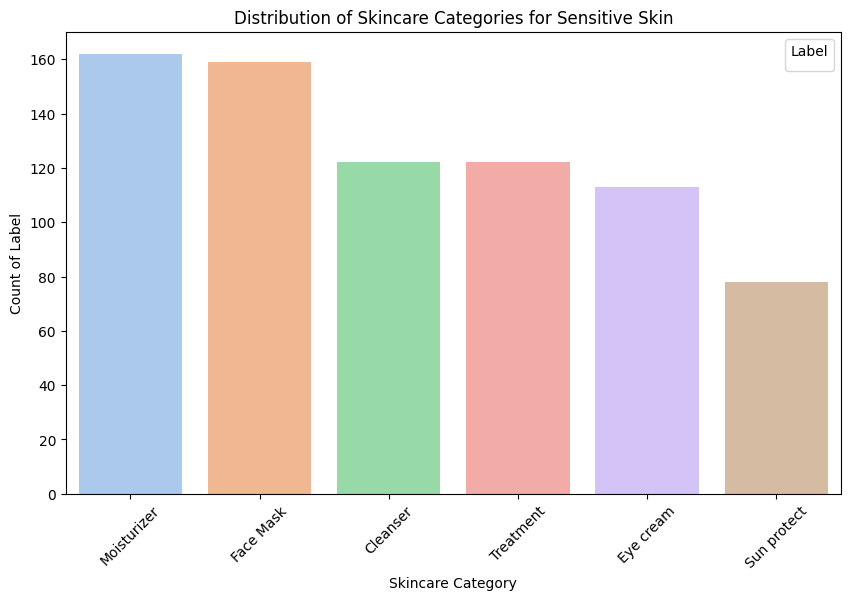

In [53]:
# Filter data untuk hanya mencakup produk dengan nilai "1" di kolom "Sensitive"
Sensitive_skin_data = df[df['Sensitive'] == 1]

# Kelompokkan produk berdasarkan kategori moisturizer dan hitung jumlah produk dalam setiap kelompok
Sensitive_skin_counts = Sensitive_skin_data['Label'].value_counts().reset_index(name='Count')

# Buat bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=Sensitive_skin_counts, x='Label', y='Count', hue='Label', palette='pastel', dodge=False)
plt.title('Distribution of Skincare Categories for Sensitive Skin')
plt.xlabel('Skincare Category')
plt.ylabel('Count of Label')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar mudah dibaca
plt.legend(title='Label', loc='upper right')
plt.show()

Data diatas menunjukkan bahwa produk Moisturizer adalah produk yang paling cocok untuk kulit sensitif dibandingkan dengan face mask, cleanser, treatment,eye cream, dan sun protect.

In [62]:
# Filter data untuk hanya mencakup produk dengan Combination=1
filtered_df = df[df['Combination'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)
print("Kulit Kombinasi")
# Menampilkan hasil
for i, label in enumerate(labels):
    print(f"Top 10 Brand Terbaik untuk Label '{label}':")
    print(results[i])
    print()

Kulit Kombinasi
Top 10 Brand Terbaik untuk Label 'Moisturizer':
           Label                Brand      Rank
216  Moisturizer   REN CLEAN SKINCARE  4.900000
193  Moisturizer                GO-TO  4.800000
175  Moisturizer                BELIF  4.633333
227  Moisturizer  YOUTH TO THE PEOPLE  4.600000
208  Moisturizer              LANEIGE  4.600000
217  Moisturizer        SATURDAY SKIN  4.600000
221  Moisturizer           SON & PARK  4.600000
176  Moisturizer            BIOSSANCE  4.500000
198  Moisturizer           JACK BLACK  4.500000
206  Moisturizer               LANCER  4.500000

Top 10 Brand Terbaik untuk Label 'Cleanser':
       Label                      Brand  Rank
10  Cleanser                 CLARISONIC   5.0
18  Cleanser                ERNO LASZLO   5.0
8   Cleanser          CHARLOTTE TILBURY   4.9
25  Cleanser                      GO-TO   4.9
4   Cleanser                  BIOSSANCE   4.8
39  Cleanser                     NUFACE   4.7
32  Cleanser                     KORRES 

In [63]:
# Filter data untuk hanya mencakup produk dengan Dry=1
filtered_df = df[df['Dry'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)
print("Kulit Kering")
# Menampilkan hasil
for i, label in enumerate(labels):
    print(f"Top 10 Brand Terbaik untuk Label '{label}':")
    print(results[i])
    print()

Kulit Kering
Top 10 Brand Terbaik untuk Label 'Moisturizer':
           Label                Brand      Rank
211  Moisturizer   REN CLEAN SKINCARE  4.900000
189  Moisturizer                GO-TO  4.800000
222  Moisturizer  YOUTH TO THE PEOPLE  4.800000
172  Moisturizer                BELIF  4.666667
212  Moisturizer        SATURDAY SKIN  4.600000
216  Moisturizer           SON & PARK  4.600000
203  Moisturizer              LANEIGE  4.560000
173  Moisturizer            BIOSSANCE  4.500000
201  Moisturizer               LANCER  4.500000
199  Moisturizer               KORRES  4.400000

Top 10 Brand Terbaik untuk Label 'Cleanser':
       Label                Brand  Rank
10  Cleanser           CLARISONIC   5.0
18  Cleanser          ERNO LASZLO   5.0
8   Cleanser    CHARLOTTE TILBURY   4.9
25  Cleanser                GO-TO   4.9
4   Cleanser            BIOSSANCE   4.8
0   Cleanser         AMOREPACIFIC   4.7
13  Cleanser  DR. BRANDT SKINCARE   4.7
37  Cleanser               NUFACE   4.7
31  C

In [64]:
# Filter data untuk hanya mencakup produk dengan Normal=1
filtered_df = df[df['Normal'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)
print("Kulit Normal")
# Menampilkan hasil
for i, label in enumerate(labels):
    print(f"Top 10 Brand Terbaik untuk Label '{label}':")
    print(results[i])
    print()

Kulit Normal
Top 10 Brand Terbaik untuk Label 'Moisturizer':
           Label                Brand      Rank
216  Moisturizer   REN CLEAN SKINCARE  4.900000
193  Moisturizer                GO-TO  4.800000
175  Moisturizer                BELIF  4.625000
227  Moisturizer  YOUTH TO THE PEOPLE  4.600000
217  Moisturizer        SATURDAY SKIN  4.600000
221  Moisturizer           SON & PARK  4.600000
208  Moisturizer              LANEIGE  4.566667
176  Moisturizer            BIOSSANCE  4.500000
198  Moisturizer           JACK BLACK  4.500000
206  Moisturizer               LANCER  4.500000

Top 10 Brand Terbaik untuk Label 'Cleanser':
       Label                      Brand  Rank
10  Cleanser                 CLARISONIC   5.0
18  Cleanser                ERNO LASZLO   5.0
8   Cleanser          CHARLOTTE TILBURY   4.9
25  Cleanser                      GO-TO   4.9
4   Cleanser                  BIOSSANCE   4.8
39  Cleanser                     NUFACE   4.7
32  Cleanser                     KORRES   4

In [66]:
# Filter data untuk hanya mencakup produk dengan Oily=1
filtered_df = df[df['Oily'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)
print("Kulit Berminyak")
# Menampilkan hasil
for i, label in enumerate(labels):
    print(f"Top 10 Brand Terbaik untuk Label '{label}':")
    print(results[i])
    print()

Kulit Berminyak
Top 10 Brand Terbaik untuk Label 'Moisturizer':
           Label                Brand  Rank
210  Moisturizer   REN CLEAN SKINCARE  4.90
187  Moisturizer                GO-TO  4.80
169  Moisturizer                BELIF  4.60
211  Moisturizer        SATURDAY SKIN  4.60
215  Moisturizer           SON & PARK  4.60
192  Moisturizer           JACK BLACK  4.50
200  Moisturizer               LANCER  4.50
202  Moisturizer              LANEIGE  4.50
221  Moisturizer  YOUTH TO THE PEOPLE  4.50
170  Moisturizer            BIOSSANCE  4.45

Top 10 Brand Terbaik untuk Label 'Cleanser':
       Label              Brand  Rank
10  Cleanser         CLARISONIC   5.0
18  Cleanser        ERNO LASZLO   5.0
8   Cleanser  CHARLOTTE TILBURY   4.9
25  Cleanser              GO-TO   4.9
4   Cleanser          BIOSSANCE   4.8
34  Cleanser             LANCER   4.7
39  Cleanser             NUFACE   4.7
32  Cleanser             KORRES   4.6
0   Cleanser       AMOREPACIFIC   4.6
1   Cleanser       BAREMIN

In [68]:
# Filter data untuk hanya mencakup produk dengan Sensitive=1
filtered_df = df[df['Sensitive'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)
print("Kulit Sensitive")
# Menampilkan hasil
for i, label in enumerate(labels):
    print(f"Top 10 Brand Terbaik untuk Label '{label}':")
    print(results[i])
    print()

Kulit Sensitive
Top 10 Brand Terbaik untuk Label 'Moisturizer':
           Label                Brand  Rank
195  Moisturizer   REN CLEAN SKINCARE  4.90
172  Moisturizer                GO-TO  4.80
158  Moisturizer                BELIF  4.70
206  Moisturizer  YOUTH TO THE PEOPLE  4.60
196  Moisturizer        SATURDAY SKIN  4.60
200  Moisturizer           SON & PARK  4.60
159  Moisturizer            BIOSSANCE  4.50
177  Moisturizer           JACK BLACK  4.50
185  Moisturizer               LANCER  4.50
187  Moisturizer              LANEIGE  4.48

Top 10 Brand Terbaik untuk Label 'Cleanser':
       Label                      Brand  Rank
8   Cleanser                 CLARISONIC   5.0
14  Cleanser                ERNO LASZLO   5.0
6   Cleanser          CHARLOTTE TILBURY   4.9
20  Cleanser                      GO-TO   4.9
0   Cleanser               AMOREPACIFIC   4.7
31  Cleanser                     NUFACE   4.7
25  Cleanser                     KORRES   4.6
10  Cleanser  DR. DENNIS GROSS SKINCAR

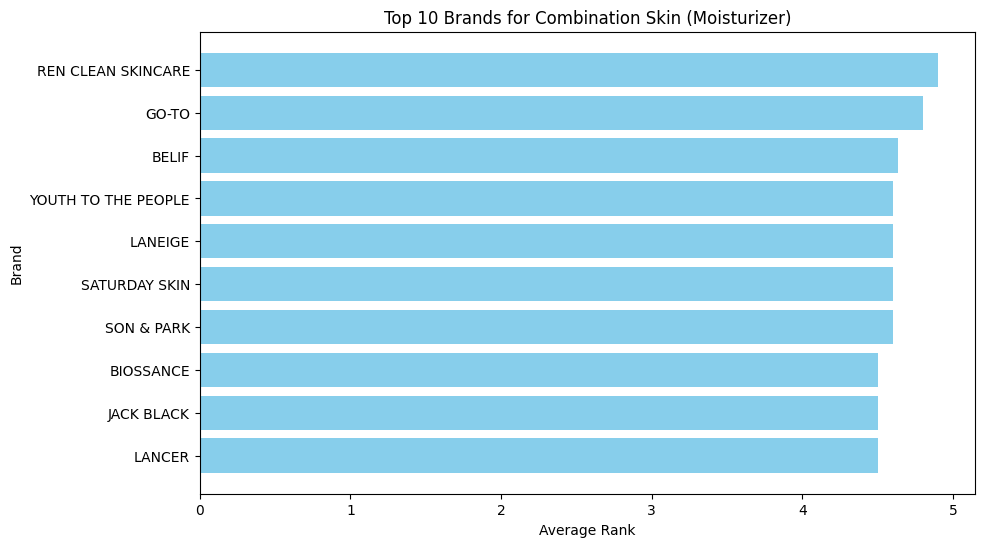

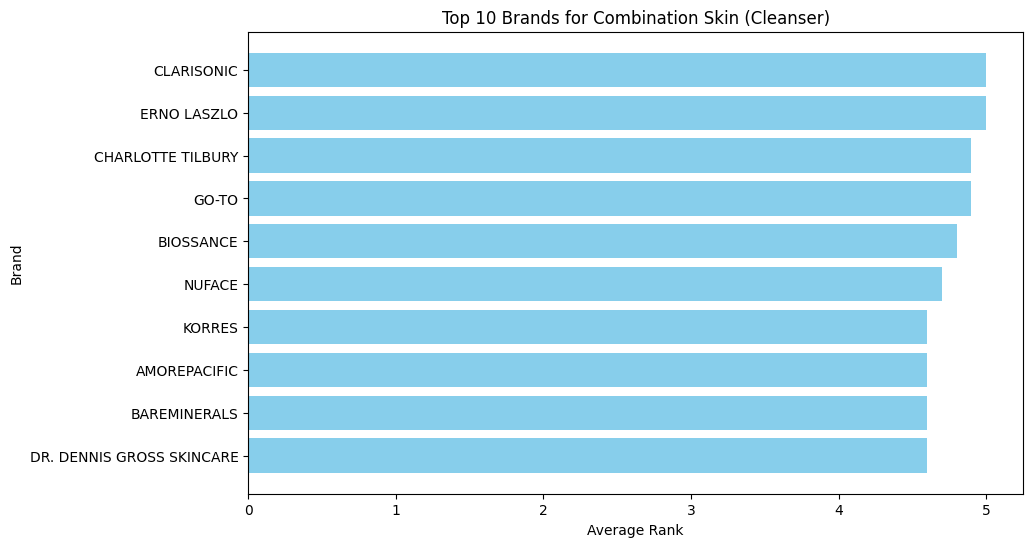

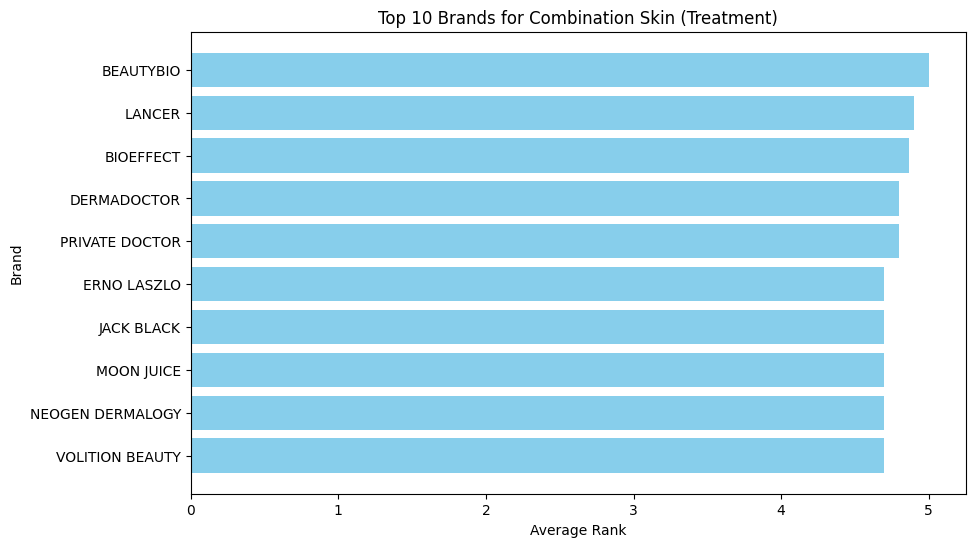

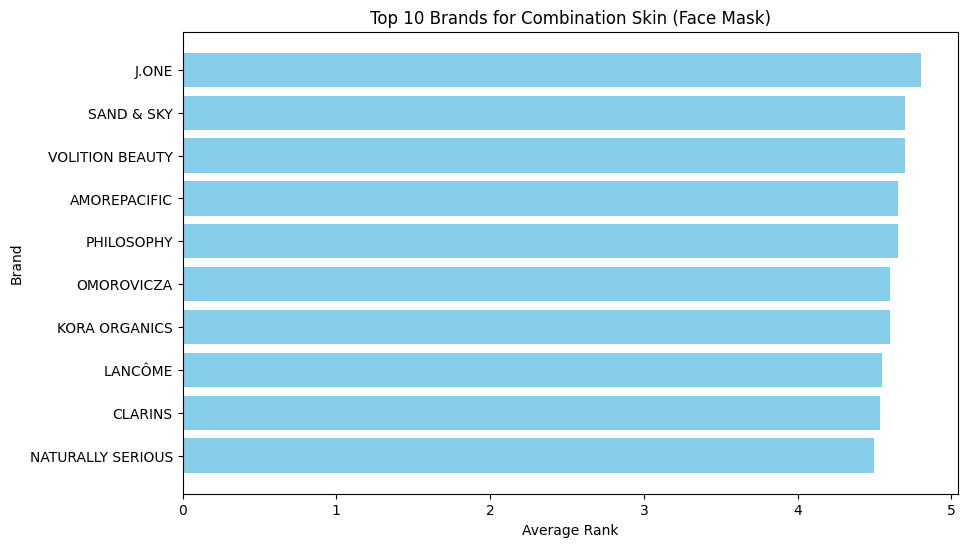

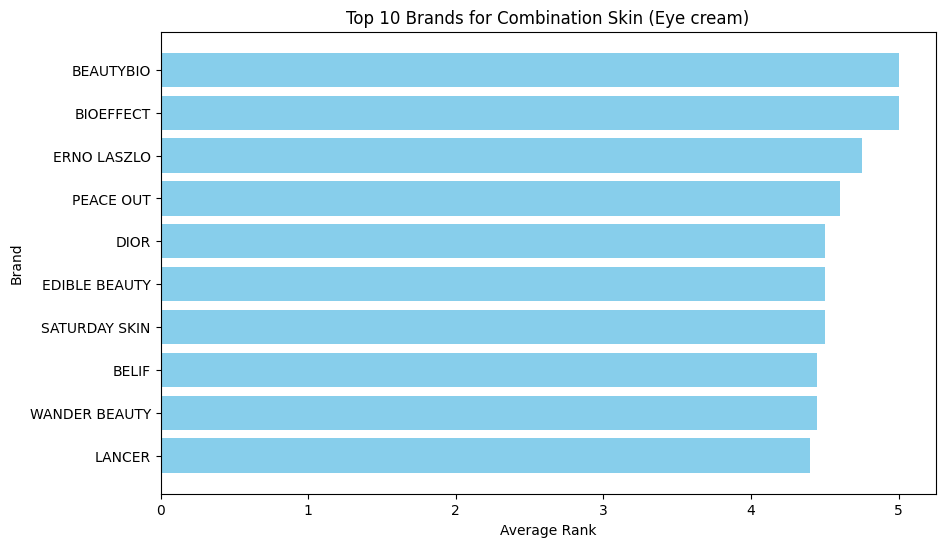

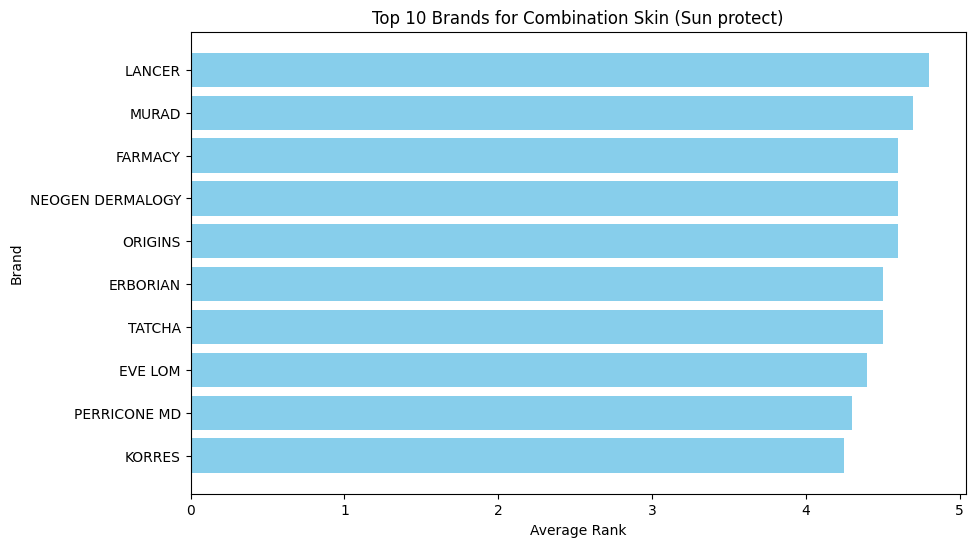

In [73]:
# Filter data untuk hanya mencakup produk dengan Combination=1
filtered_df = df[df['Combination'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)

# Menampilkan hasil dalam bentuk bar graph
for i, label in enumerate(labels):
    top_10_brands = results[i]
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_brands['Brand'], top_10_brands['Rank'], color='skyblue')
    plt.xlabel('Average Rank')
    plt.ylabel('Brand')
    plt.title(f"Top 10 Brands for Combination Skin ({label})")
    plt.gca().invert_yaxis() # Membalikkan sumbu y agar bar dengan nilai tertinggi berada di atas
    plt.show()

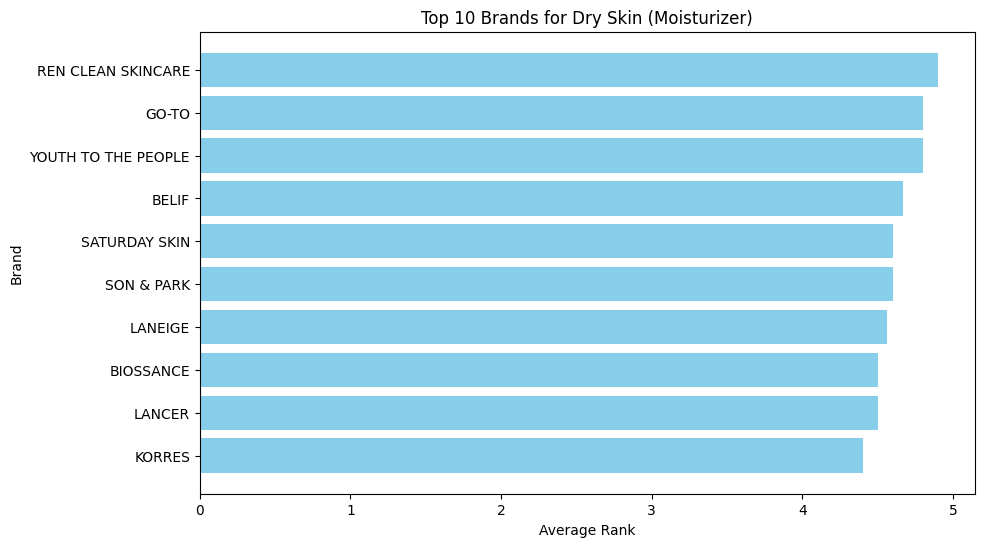

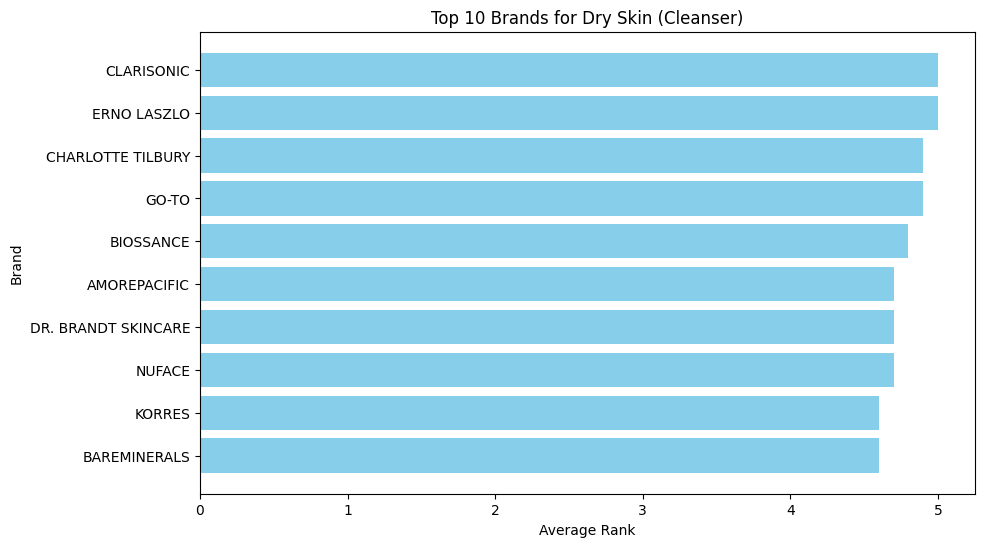

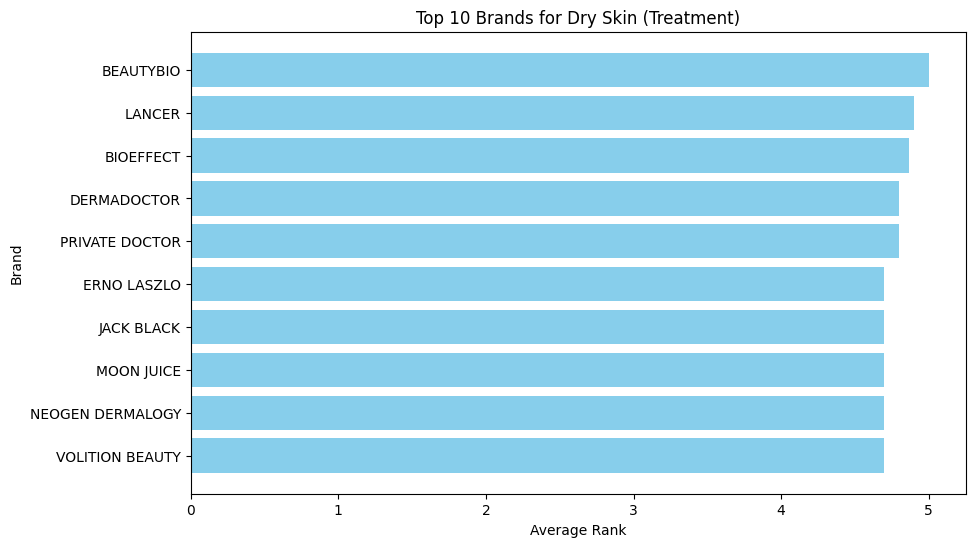

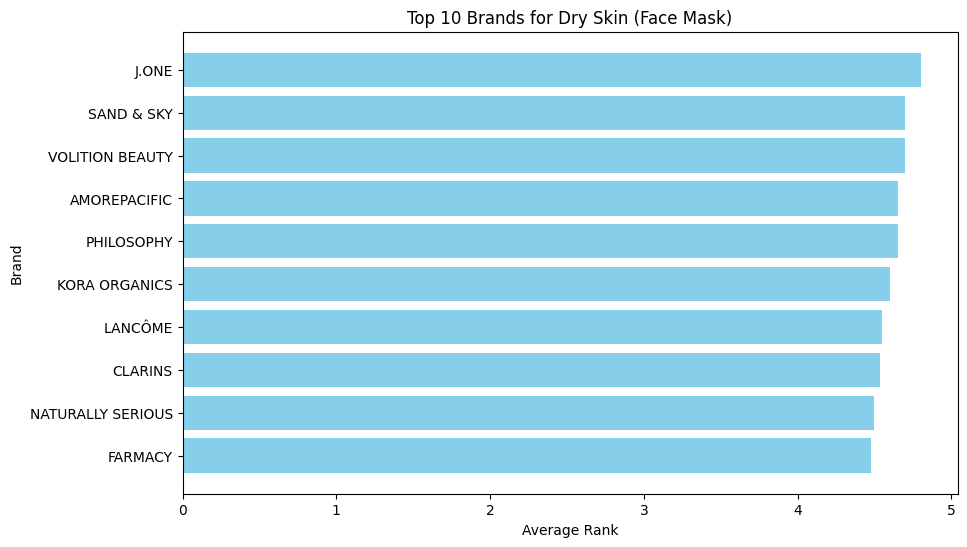

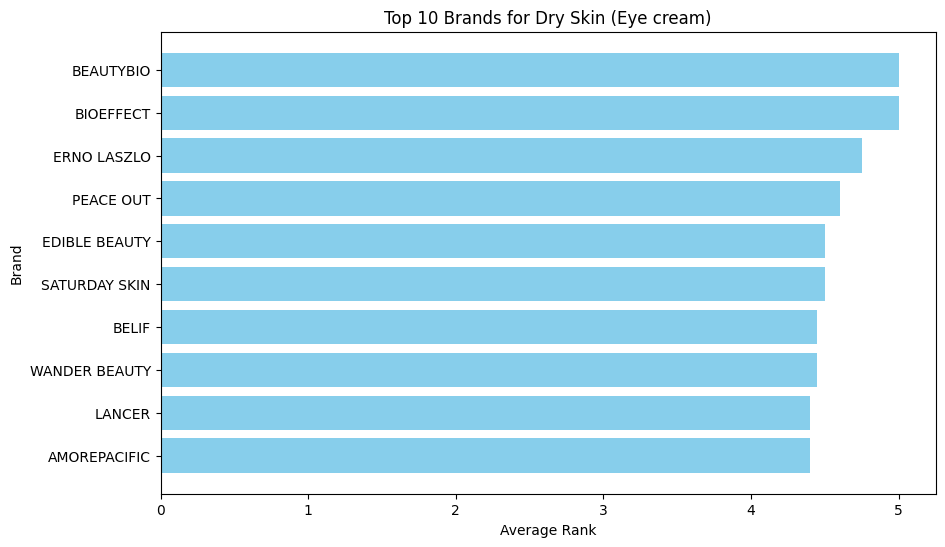

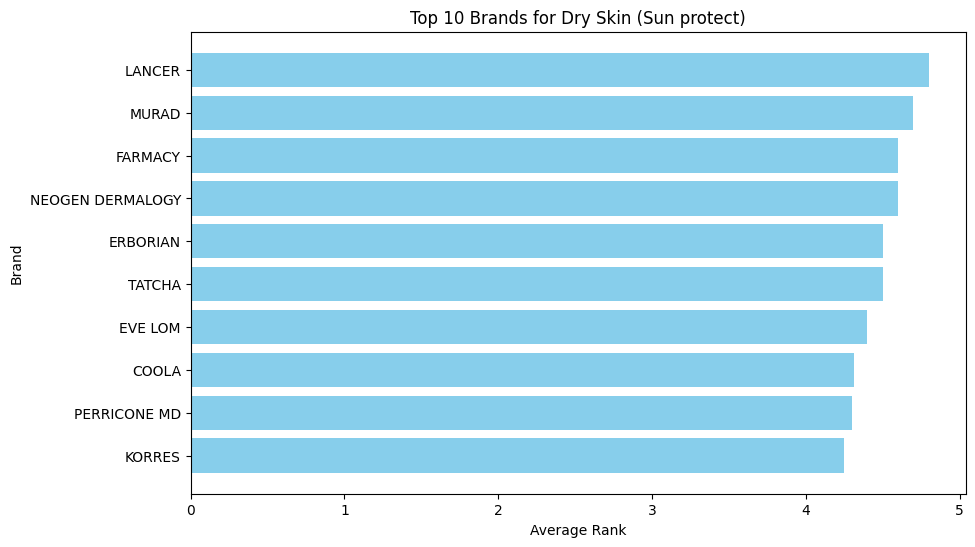

In [74]:
# Filter data untuk hanya mencakup produk dengan Dry=1
filtered_df = df[df['Dry'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)

# Menampilkan hasil dalam bentuk bar graph
for i, label in enumerate(labels):
    top_10_brands = results[i]
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_brands['Brand'], top_10_brands['Rank'], color='skyblue')
    plt.xlabel('Average Rank')
    plt.ylabel('Brand')
    plt.title(f"Top 10 Brands for Dry Skin ({label})")
    plt.gca().invert_yaxis() # Membalikkan sumbu y agar bar dengan nilai tertinggi berada di atas
    plt.show()

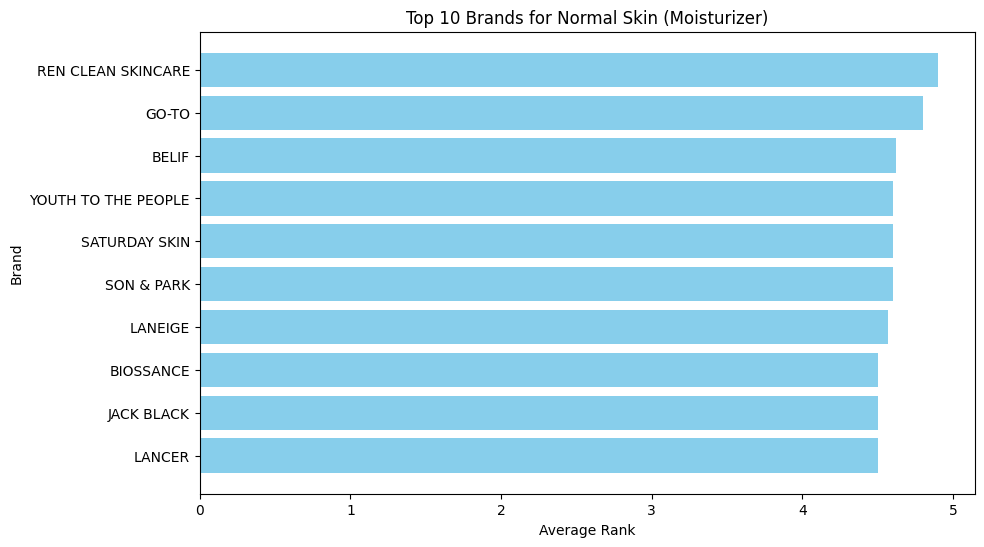

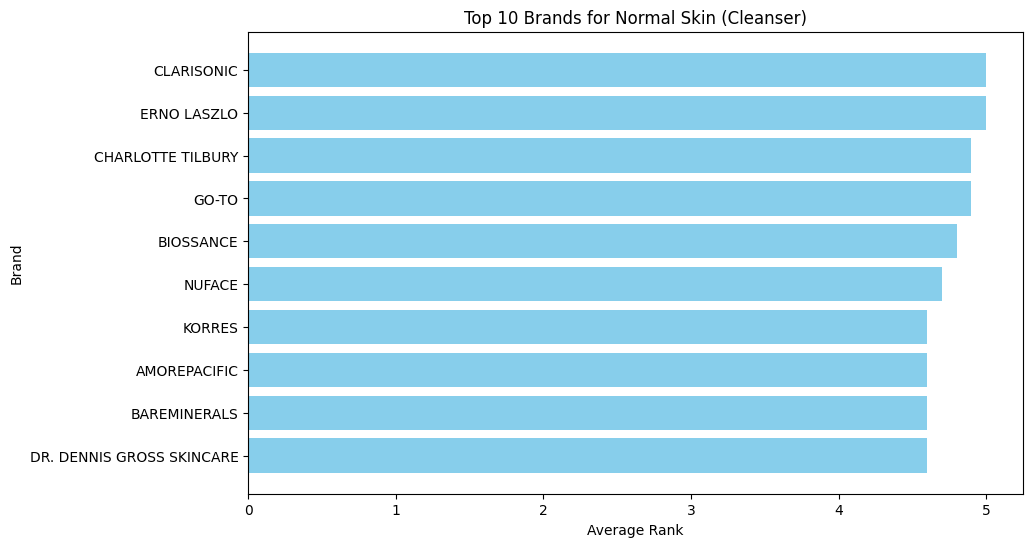

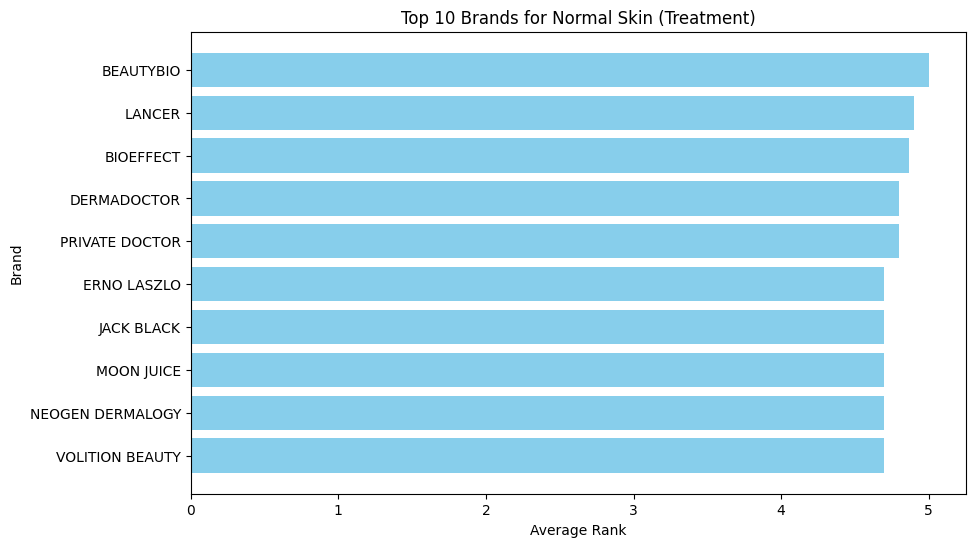

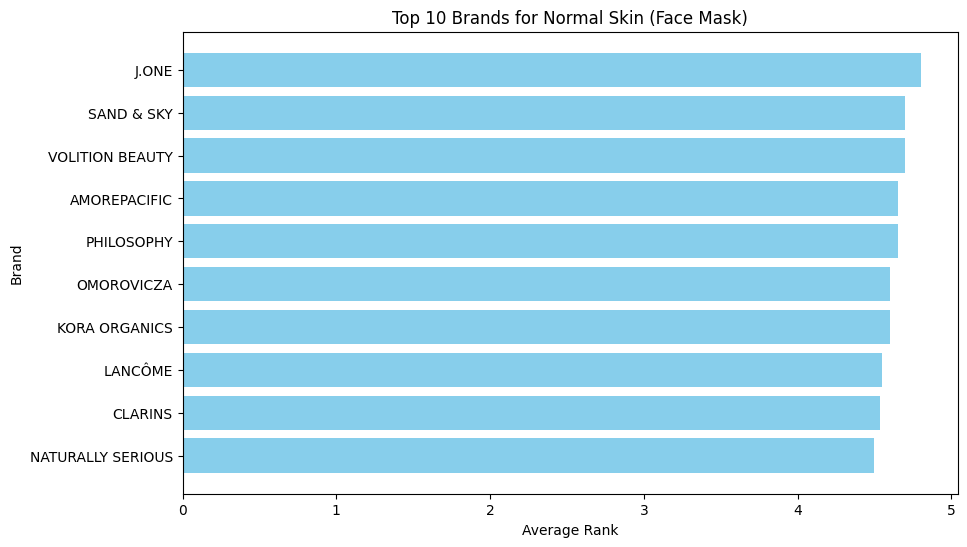

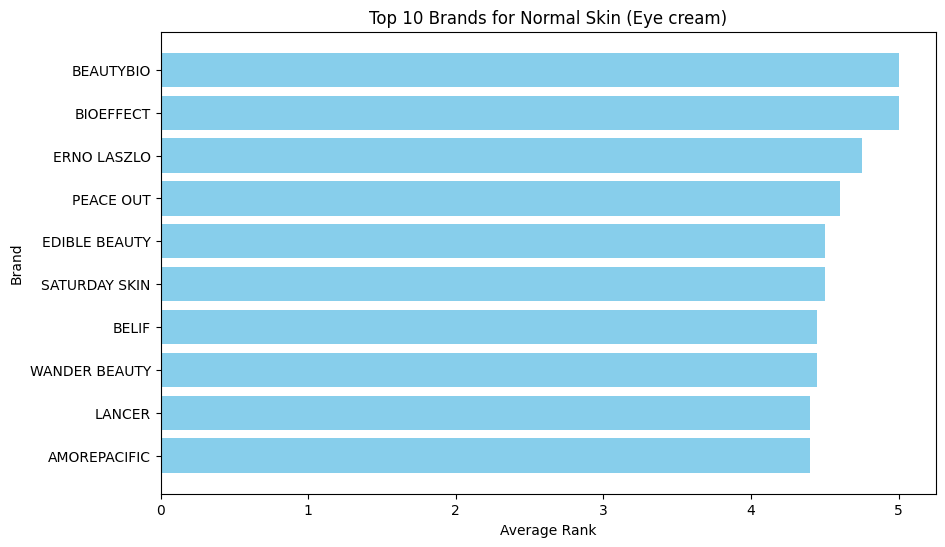

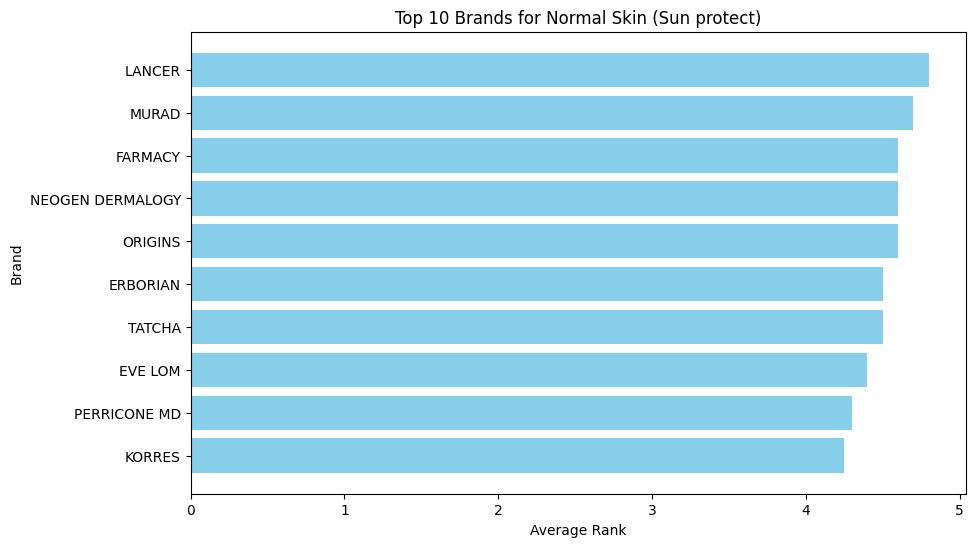

In [75]:
# Filter data untuk hanya mencakup produk dengan Normal=1
filtered_df = df[df['Normal'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)

# Menampilkan hasil dalam bentuk bar graph
for i, label in enumerate(labels):
    top_10_brands = results[i]
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_brands['Brand'], top_10_brands['Rank'], color='skyblue')
    plt.xlabel('Average Rank')
    plt.ylabel('Brand')
    plt.title(f"Top 10 Brands for Normal Skin ({label})")
    plt.gca().invert_yaxis() # Membalikkan sumbu y agar bar dengan nilai tertinggi berada di atas
    plt.show()

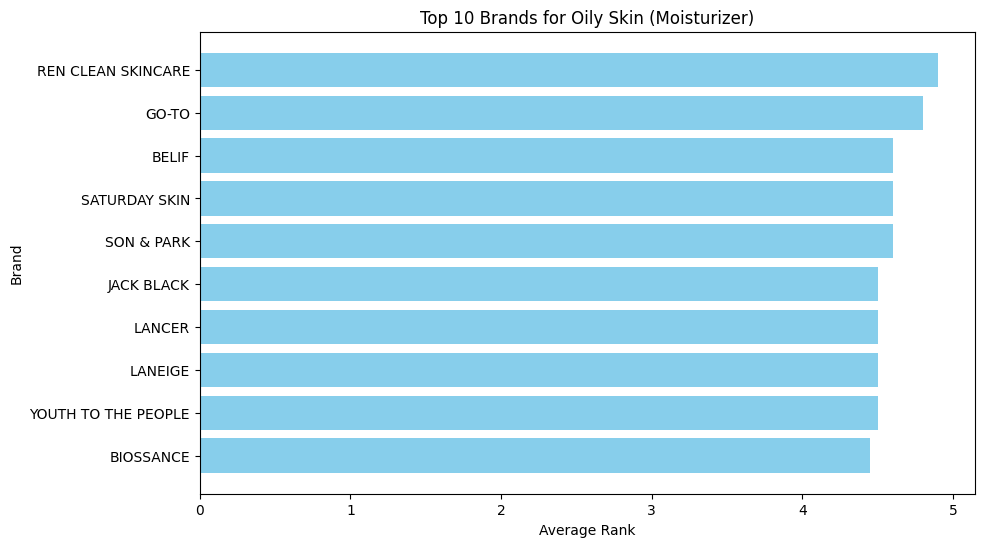

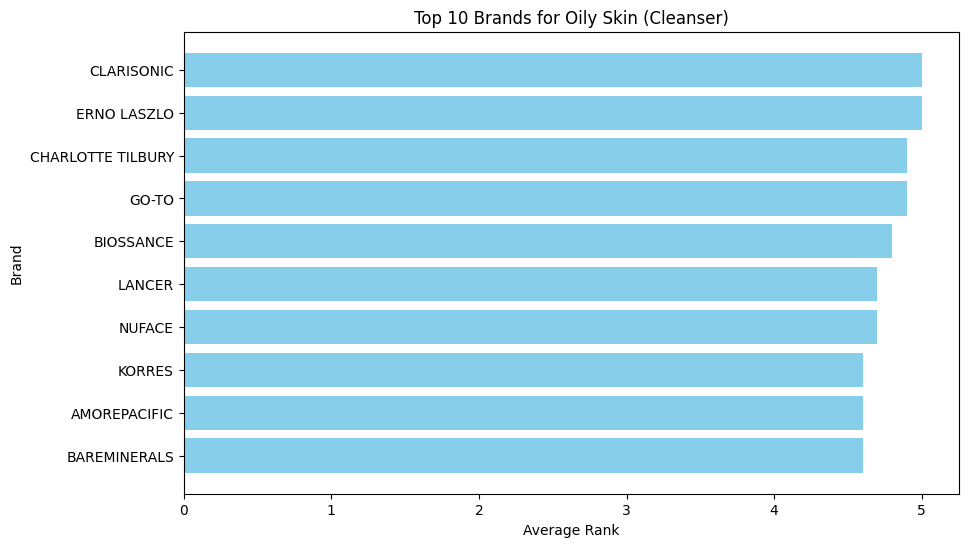

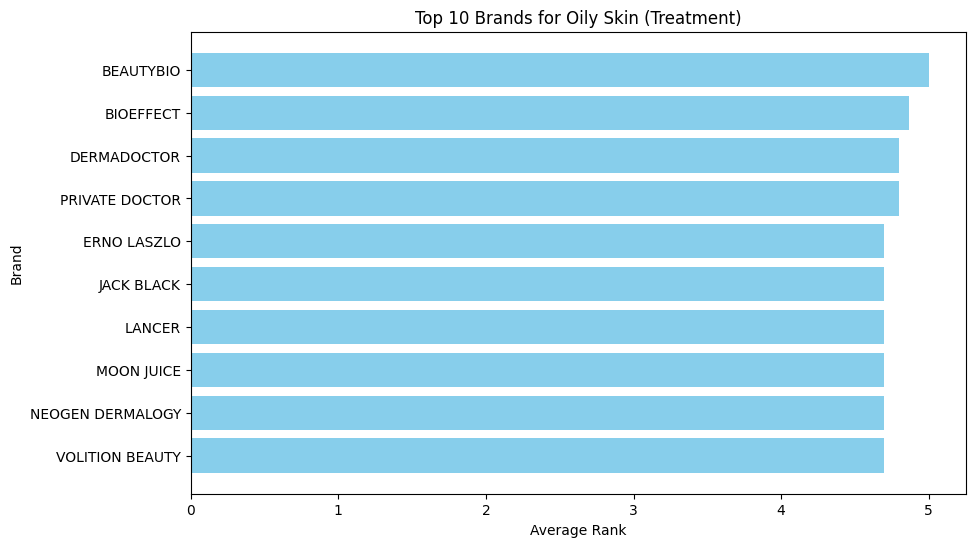

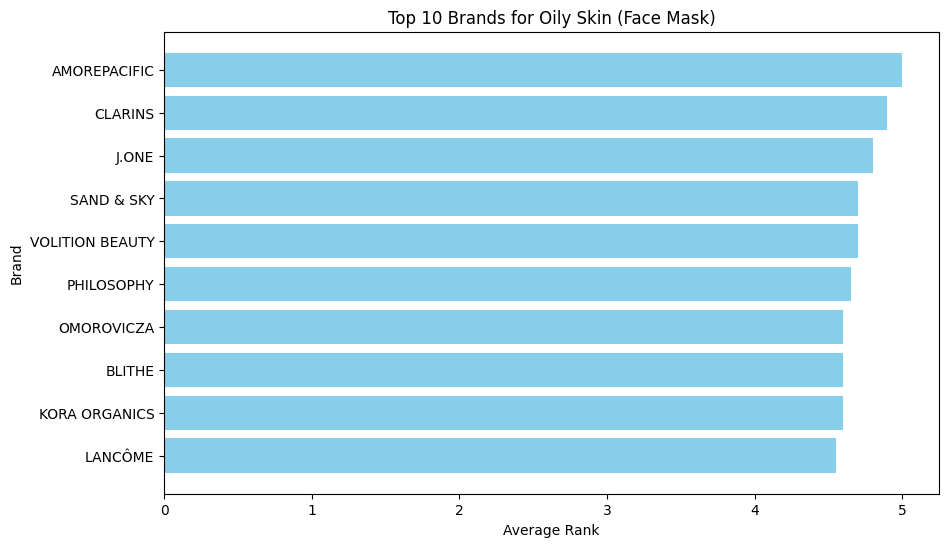

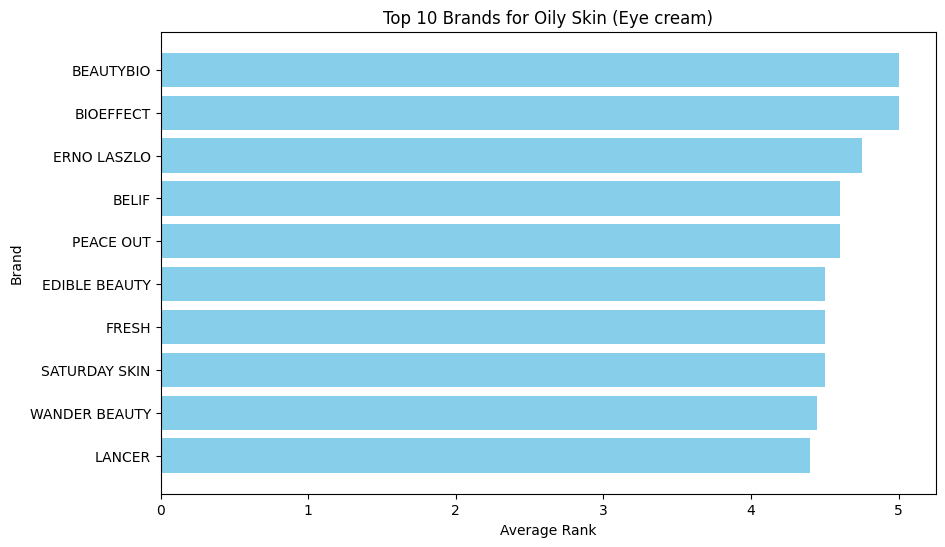

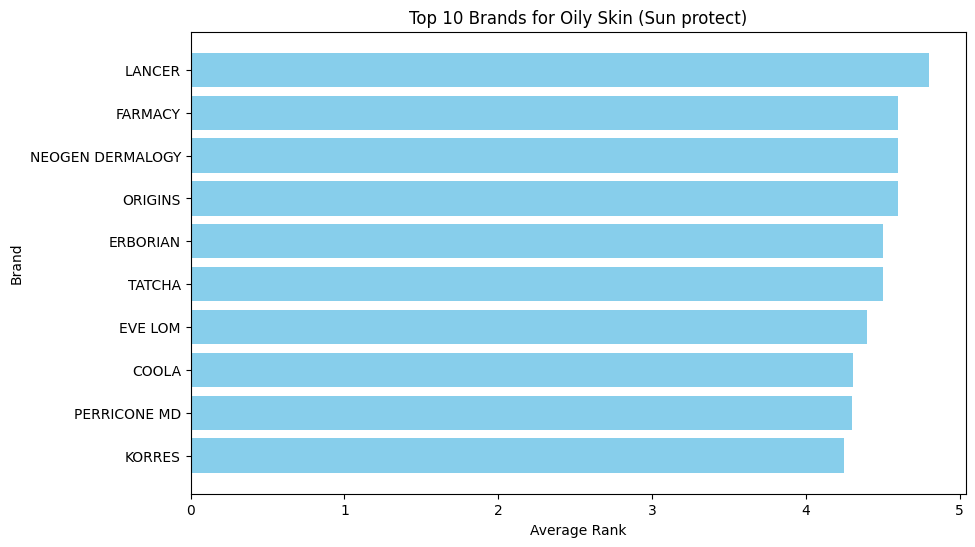

In [76]:
# Filter data untuk hanya mencakup produk dengan Oily=1
filtered_df = df[df['Oily'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)

# Menampilkan hasil dalam bentuk bar graph
for i, label in enumerate(labels):
    top_10_brands = results[i]
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_brands['Brand'], top_10_brands['Rank'], color='skyblue')
    plt.xlabel('Average Rank')
    plt.ylabel('Brand')
    plt.title(f"Top 10 Brands for Oily Skin ({label})")
    plt.gca().invert_yaxis() # Membalikkan sumbu y agar bar dengan nilai tertinggi berada di atas
    plt.show()

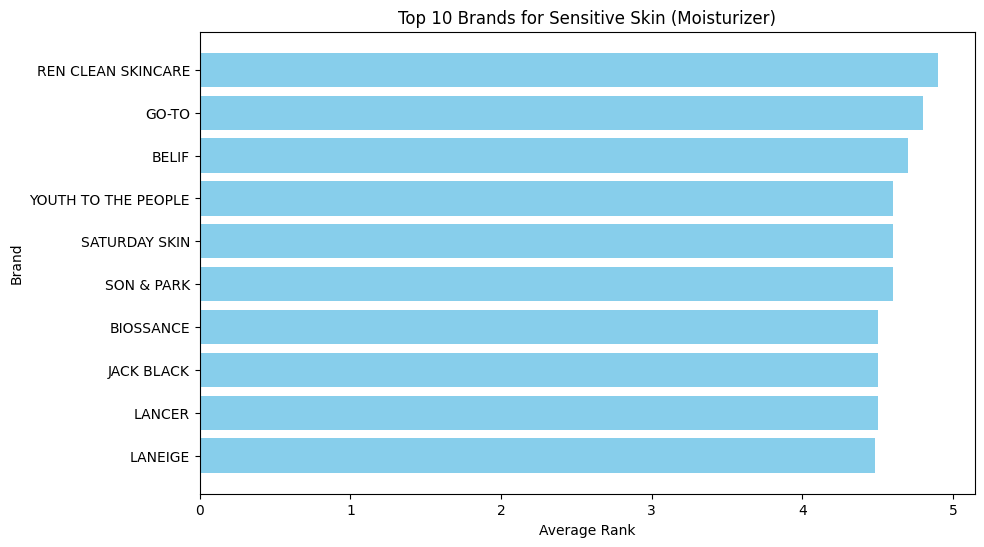

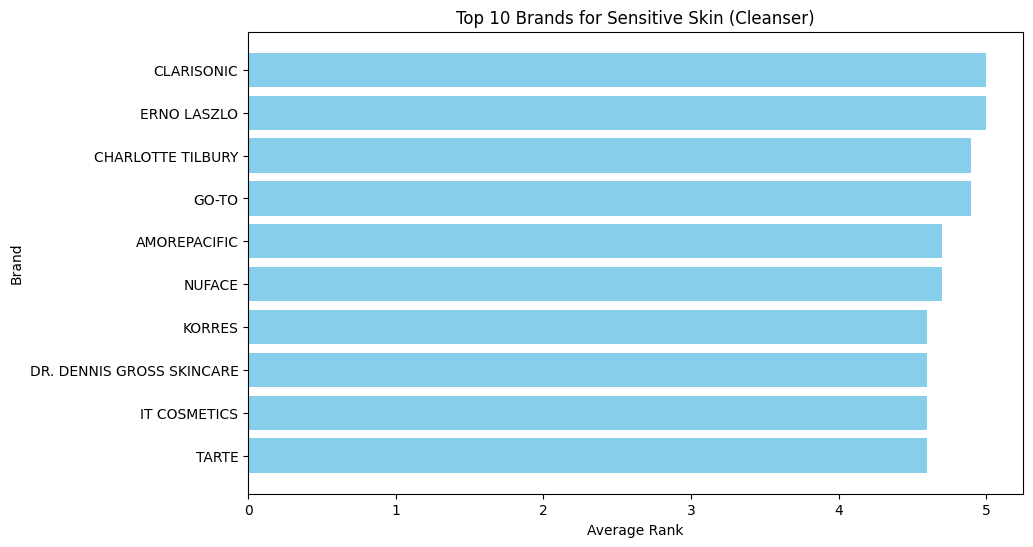

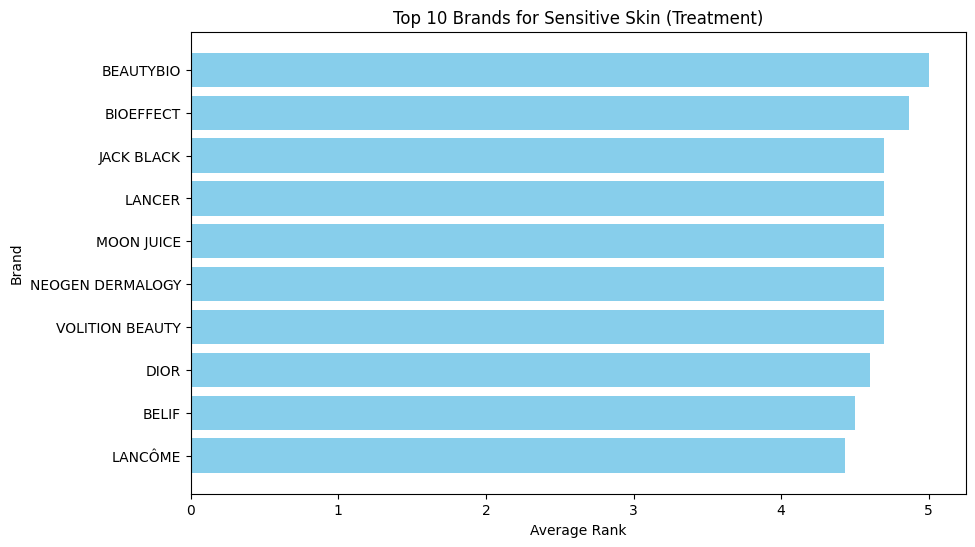

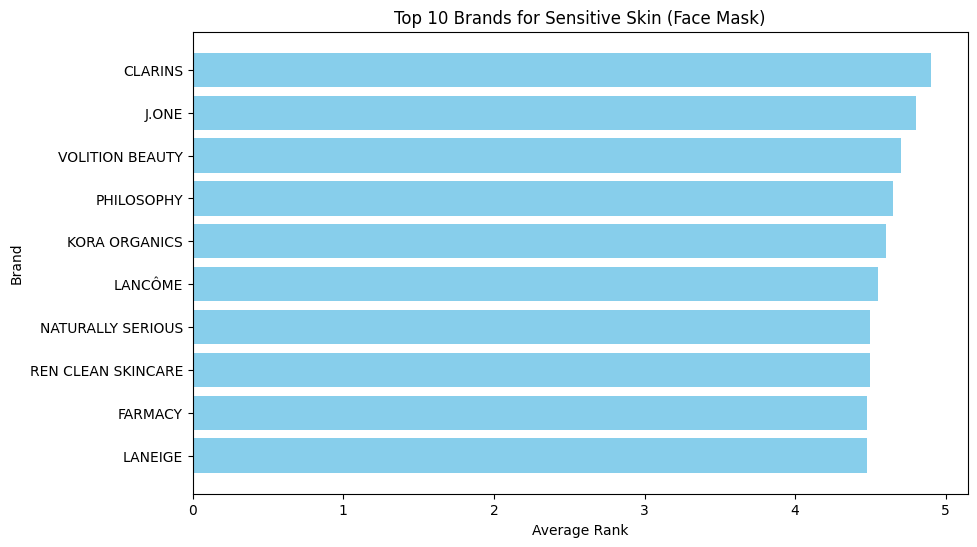

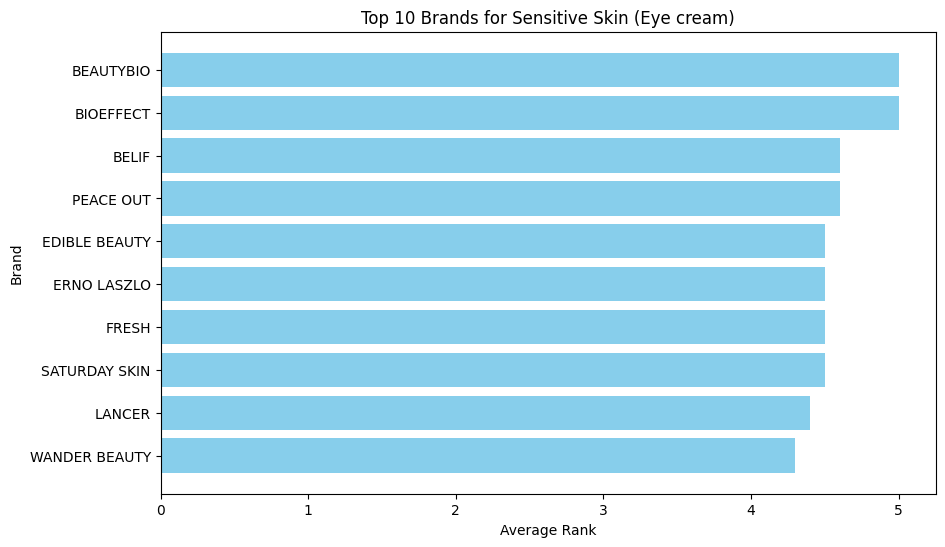

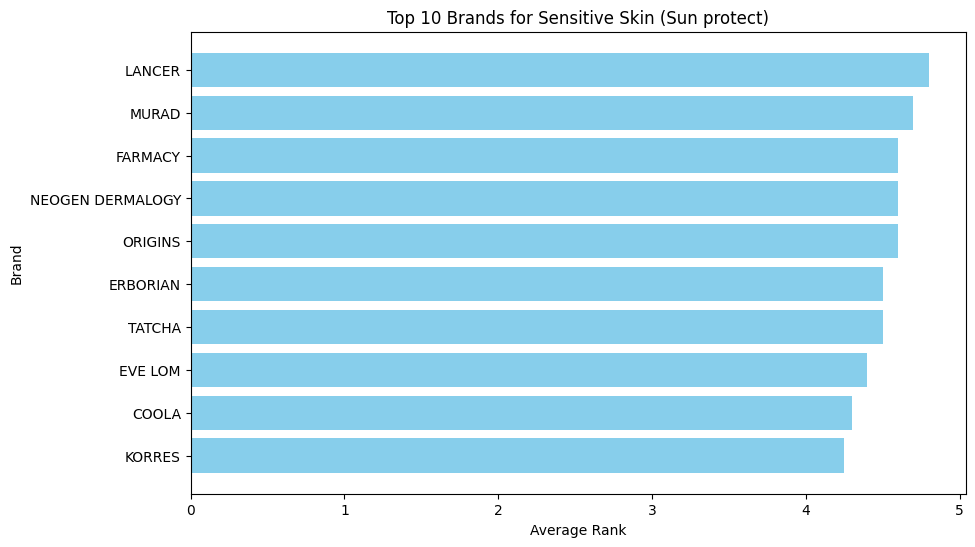

In [77]:
# Filter data untuk hanya mencakup produk dengan Sensitive=1
filtered_df = df[df['Sensitive'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)

# Menampilkan hasil dalam bentuk bar graph
for i, label in enumerate(labels):
    top_10_brands = results[i]
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_brands['Brand'], top_10_brands['Rank'], color='skyblue')
    plt.xlabel('Average Rank')
    plt.ylabel('Brand')
    plt.title(f"Top 10 Brands for Sensitive Skin ({label})")
    plt.gca().invert_yaxis() # Membalikkan sumbu y agar bar dengan nilai tertinggi berada di atas
    plt.show()